In [1]:
%matplotlib inline 
import numpy as np

import arrayfire as af
from scipy import ndimage
import matplotlib.pyplot as plt

from activations import *

In [2]:
af.info()

L = Linear()
S = Sigmoid()
T = Tanh()

## Creating Variables to test the activation functions

In [4]:
x_1D = np.arange(-4, 4,0.01, dtype=np.float32)

x_3D = np.asarray(ndimage.imread('./test.jpg'), dtype=np.float32)

# Linear Activation

Testing Linear Activation

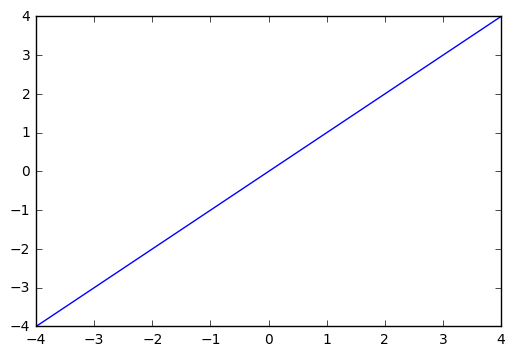

In [5]:
x = af.np_to_af_array(x_1D)
new_x = L.Fwd(x)
plt.plot(x,new_x)
plt.show()

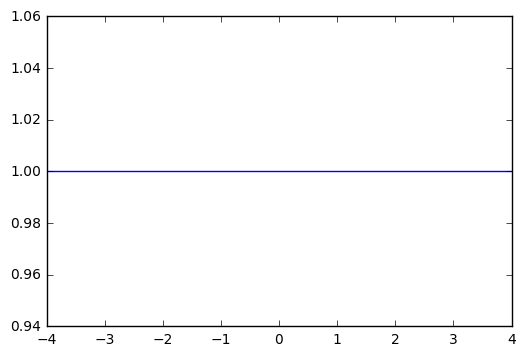

In [6]:
x = af.np_to_af_array(x_1D)
new_x = L.Bwd(x)
plt.plot(x,new_x)
plt.show()

# Sigmoid Activation

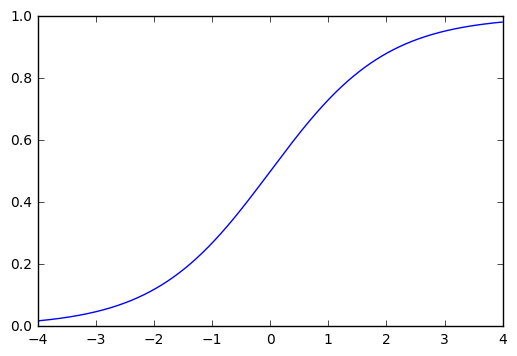

In [7]:
x = af.np_to_af_array(x_1D)
new_x = S.Fwd(x)
plt.plot(x,new_x)
plt.show()

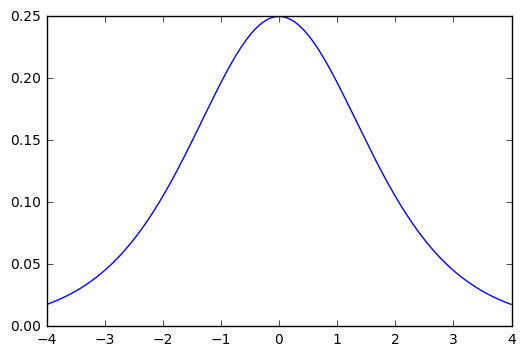

In [8]:
x = af.np_to_af_array(x_1D)
new_x = S.Bwd(x)
plt.plot(x,new_x)
plt.show()

# tanh Activation

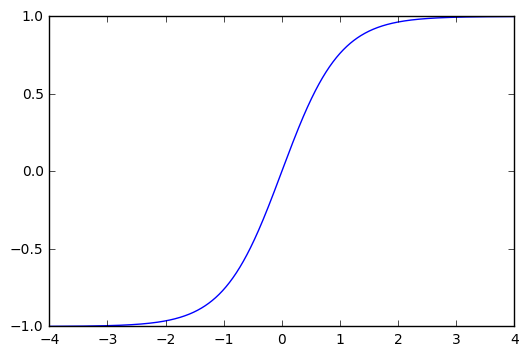

In [9]:
x = af.np_to_af_array(x_1D)
new_x = T.Fwd(x)
plt.plot(x,new_x)
plt.show()

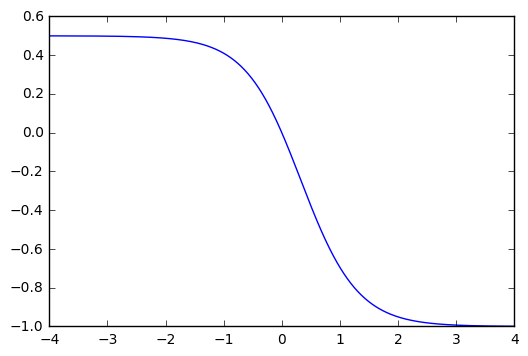

In [10]:
x = af.np_to_af_array(x_1D)
new_x = T.Bwd(x)
plt.plot(x,new_x)
plt.show()